# Example fig

This jupyter notebook simply produces a nice figure to illustrate the user preferences matrix and the utility of each topic.

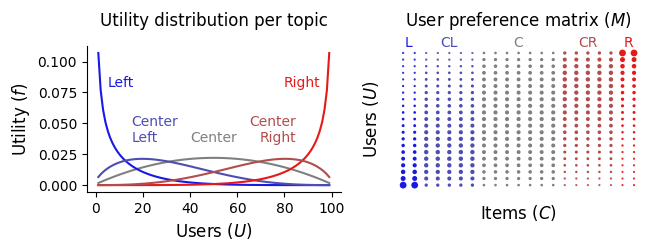

In [11]:
import matplotlib.pyplot as plt
import scipy.stats as stats
from helpers import set_size
import numpy as np
x = np.arange(1, 100, 1)


fig, axs = plt.subplots(1, 2, figsize=(6.55,2.5), gridspec_kw={"hspace": 0.05})
rvC = stats.betabinom(100, 2, 2)
axs[0].plot(x, rvC.pmf(x) * 1.5, color="#808080")
rvL = stats.betabinom(100, 0.5, 5.5)
axs[0].plot(x, rvL.pmf(x), color="#1919e6")
rvCL = stats.betabinom(100, 1.75, 4)
axs[0].plot(x, rvCL.pmf(x), color="#4d4db3")
rvR = stats.betabinom(100, 5.5, 0.5)
axs[0].plot(x, rvR.pmf(x), color="#e61919")
rvCR = stats.betabinom(100, 4, 1.75)
axs[0].plot(x, rvCR.pmf(x), color="#b34d4d")
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[0].set_xlabel("Users ($U$)", fontsize=12)
axs[0].set_ylabel("Utility ($f$)", fontsize=12)
axs[0].set_title("Utility distribution per topic", pad=15, fontsize=12)
axs[0].text( 5, 0.08, "Left", ha="left", color="#1919e6")
axs[0].text( 100 - 5, 0.08, "Right", ha="right", color="#e61919")
axs[0].text( 15, 0.035, "Center\nLeft", ha="left", color="#4d4db3")
axs[0].text( 100 - 15, 0.035, "Center\nRight", ha="right", color="#b34d4d")
axs[0].text( 50, 0.035, "Center", ha="center", color="#808080")
idx = 0
for size, color, rv in zip(
    [2, 5, 7, 5, 2],
    ["#1919e6", "#4d4db3", "#808080", "#b34d4d", "#e61919"],
    [rvL, rvCL, rvC, rvCR, rvR]
):
    
    for i in range(size):
        x = np.arange(0, 101, 5)

        axs[1].scatter([i + idx] * len(x), x, color=color, s=np.sqrt(rv.pmf(x)*1000 + 0.08), marker="o")
    idx += size
    
# axs[1].set_xlim([-1.5, 100])
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].set_xlabel("Items ($C$)", fontsize=12)
axs[1].set_ylabel("Users ($U$)", fontsize=12)
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_title("User preference matrix ($M$)", pad=15, fontsize=12)
axs[1].text( 0.5, 105, "L", ha="center", color="#1919e6")
axs[1].text( 2 + 5/2 - .5, 105, "CL", ha="center", color="#4d4db3")
axs[1].text( 2 + 5 + 7/2  - .5, 105, "C", ha="center", color="#808080")
axs[1].text( 2 +5 + 7 + 5/2 - .5, 105, "CR", ha="center", color="#b34d4d")
axs[1].text( 2 +5 + 7 + 5 + 2/2 - .5, 105, "R", ha="center", color="#e61919")
set_size(fig, (6.55, 2.5))
fig.savefig("example.pdf", bbox_inches="tight")
